In [1]:
# Install required libraries (only needs to be run once)
%pip install PyPDF2 pillow pyinstaller


Note: you may need to restart the kernel to use updated packages.


PDF Scraper!

In [2]:
import re
import csv
import PyPDF2

morgana icon  

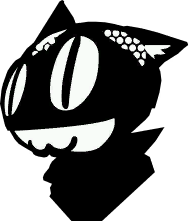

Converted to morgana.ico ✅


In [3]:
from IPython.display import display
from PIL import Image

# Load and preview morgana.png if already in your working directory
img = Image.open("morgana.png")
display(img)
ico_path = "morgana.ico"
img.save(ico_path)
print("Converted to morgana.ico ✅")



In [ ]:
# Save your main parsing script as lab_parser_gui.py
script_code = '''import re
import csv
import PyPDF2

# Updated CSV headers with case sensitivity as provided
csv_headers = [
    "Client Name", "Area Name", "Site Name", "Manhole Name", "sample id", "Sampling Date", "Collection Time", "Sector", "Automated S.",
    "Sampling Type", "Lab Name", "pH (Field Measurement)", "EC (Field Measurement)", "ORP (Field Measurement)", "Temperature (Field Measurement)",
    "name/Parameter", "is_exceeded", "value", "units", "NVL (Log10)", "Manhole ID", "Gis ID", "WWTP", "Below detection limit",
    "No analysis was performed"
]

# Function to extract text from PDF
def extract_pdf_text(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text


# Function to extract key measurement values from text
def parse_measurements(text):
    def extract_value(pattern, default=""):
        match = re.search(pattern, text, re.IGNORECASE)
        return match.group(1).strip() if match else default

    return {
        "pH (Field Measurement)": extract_value(r"pH[^0-9]{0,10}([\d.]+)"),
        "EC (Field Measurement)": extract_value(r"(?:EC|Conductivity)[^0-9]{0,10}([\d.]+)"),
        "ORP (Field Measurement)": extract_value(r"ORP[^0-9]{0,10}([\d.]+)"),
        "Temperature (Field Measurement)": extract_value(r"(?:Temperature|Temp)[^0-9]{0,10}([\d.]+)")
    }

# Function to build a row using extracted data
def generate_csv_row(parsed_data):
    row = [
        "Client Name Placeholder",  # Client Name
        "Area Name Placeholder",    # Area Name
        "Site Name Placeholder",    # Site Name
        "Manhole Name Placeholder", # Manhole Name
        "Sample001",                # sample id
        "2025-06-06",               # Sampling Date
        "12:00",                    # Collection Time
        "Sector A",                 # Sector
        "No",                       # Automated S.
        "Grab",                     # Sampling Type
        "ABC Labs",                 # Lab Name
        parsed_data["pH (Field Measurement)"],
        parsed_data["EC (Field Measurement)"],
        parsed_data["ORP (Field Measurement)"],
        parsed_data["Temperature (Field Measurement)"],
        "Ammonia",                 # name/Parameter (example)
        "No",                      # is_exceeded
        "0.15",                    # value
        "mg/L",                    # units
        "1.0",                     # NVL (Log10)
        "MH001",                   # Manhole ID
        "GIS-0001",                # Gis ID
        "East WWTP",               # WWTP
        "No",                      # Below detection limit
        "No"                       # No analysis was performed
    ]
    return row

# Main function to run the script
def convert_pdf_to_csv(pdf_path, output_csv_path):
    text = extract_pdf_text(pdf_path)
    parsed = parse_measurements(text)
    row = generate_csv_row(parsed)

    with open(output_csv_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(csv_headers)
        writer.writerow(row)

    print(f"CSV file saved to: {output_csv_path}")

# Example usage
if __name__ == "__main__":
    pdf_path = "test.pdf"  # Replace with your actual file
    output_csv = "output_lab_data2.csv"
    convert_pdf_to_csv(pdf_path, output_csv)'''

with open("lab_parser_gui.py", "w") as f:
    f.write(script_code)

print("Saved lab_parser_gui.py ✅")


Saved lab_parser_gui.py ✅


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dtaylor\AppData\Local\Temp\ipykernel_35800\3799008331.py:2: SyntaxWarning: invalid escape sequence '\d'
  script_code = '''import re


# testing code above   

In [ ]:
from PyPDF2 import PdfReader

reader = PdfReader("test.pdf")
for page in reader.pages:
    print(page.extract_text())


spec

In [8]:
spec_content = """
block_cipher = None

a = Analysis(
    ['lab_parser_gui.py'],
    pathex=[],
    binaries=[],
    datas=[],
    hiddenimports=[],
    hookspath=[],
    runtime_hooks=[],
    excludes=[],
    win_no_prefer_redirects=False,
    win_private_assemblies=False,
    cipher=block_cipher,
)

pyz = PYZ(a.pure, a.zipped_data, cipher=block_cipher)

exe = EXE(
    pyz,
    a.scripts,
    [],
    exclude_binaries=True,
    name='LabParserApp',
    icon='morgana.ico',
    debug=False,
    bootloader_ignore_signals=False,
    strip=False,
    upx=True,
    console=False,
)

coll = COLLECT(
    exe,
    a.binaries,
    a.zipfiles,
    a.datas,
    strip=False,
    upx=True,
    name='LabParserApp'
)
"""

with open("lab_parser_gui.spec", "w") as f:
    f.write(spec_content.strip())

print("Spec file saved as lab_parser_gui.spec ✅")


Spec file saved as lab_parser_gui.spec ✅


In [ ]:
import re
import csv
import PyPDF2

# Updated CSV headers with case sensitivity as provided
csv_headers = [
    "Client Name", "Area Name", "Site Name", "Manhole Name", "sample id", "Sampling Date", "Collection Time", "Sector", "Automated S.",
    "Sampling Type", "Lab Name", "pH (Field Measurement)", "EC (Field Measurement)", "ORP (Field Measurement)", "Temperature (Field Measurement)",
    "name/Parameter", "is_exceeded", "value", "units", "NVL (Log10)", "Manhole ID", "Gis ID", "WWTP", "Below detection limit",
    "No analysis was performed"
]

# Function to extract text from PDF
def extract_pdf_text(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Function to extract key measurement values from text
def parse_measurements(text):
    def extract_value(pattern, default=""):
        match = re.search(pattern, text, re.IGNORECASE)
        return match.group(1).strip() if match else default

    return {
        "pH (Field Measurement)": extract_value(r"pH[^0-9]{0,10}([\d.]+)"),
        "EC (Field Measurement)": extract_value(r"(?:EC|Conductivity)[^0-9]{0,10}([\d.]+)"),
        "ORP (Field Measurement)": extract_value(r"ORP[^0-9]{0,10}([\d.]+)"),
        "Temperature (Field Measurement)": extract_value(r"(?:Temperature|Temp)[^0-9]{0,10}([\d.]+)")
    }

# Function to build a row using extracted data
def generate_csv_row(parsed_data):
    row = [
        "Client Name Placeholder",  # Client Name
        "Area Name Placeholder",    # Area Name
        "Site Name Placeholder",    # Site Name
        "Manhole Name Placeholder", # Manhole Name
        "Sample001",                # sample id
        "2025-06-06",               # Sampling Date
        "12:00",                    # Collection Time
        "Sector A",                 # Sector
        "No",                       # Automated S.
        "Grab",                     # Sampling Type
        "ABC Labs",                 # Lab Name
        parsed_data["pH (Field Measurement)"],
        parsed_data["EC (Field Measurement)"],
        parsed_data["ORP (Field Measurement)"],
        parsed_data["Temperature (Field Measurement)"],
        "Ammonia",                 # name/Parameter (example)
        "No",                      # is_exceeded
        "0.15",                    # value
        "mg/L",                    # units
        "1.0",                     # NVL (Log10)
        "MH001",                   # Manhole ID
        "GIS-0001",                # Gis ID
        "East WWTP",               # WWTP
        "No",                      # Below detection limit
        "No"                       # No analysis was performed
    ]
    return row

# Main function to run the script
def convert_pdf_to_csv(pdf_path, output_csv_path):
    text = extract_pdf_text(pdf_path)
    parsed = parse_measurements(text)
    row = generate_csv_row(parsed)

    with open(output_csv_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(csv_headers)
        writer.writerow(row)

    print(f"CSV file saved to: {output_csv_path}")

# Example usage
if __name__ == "__main__":
    pdf_path = "test.pdf"  # Replace with your actual file
    output_csv = "output_lab_data2.csv"
    convert_pdf_to_csv(pdf_path, output_csv)

Build  

In [9]:
# Optional: Run the parser script directly to verify GUI functionality
!python lab_parser_gui.py

  File "c:\Users\dtaylor\Documents\GitHub\DT_City_WH_Technology_Services\lab_parser_gui.py", line 19
    text += page.extract_text() + "
                                  ^
SyntaxError: unterminated string literal (detected at line 19)


Now run "pyinstaller lab_parser_gui.spec" in the terminal!

In [ ]:
# pyinstaller lab_parser_gui.spec
